## Introduction to Scikit Learn

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [20]:
# Reading data

heart_disease = pd.read_csv('../data/cleaned/heart.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [21]:
# Create X (all the feature columns)
X = heart_disease.drop("target", axis=1)

# Create y (the target column)
y = heart_disease["target"]

# Check the head of the features DataFrame
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [22]:
# Check the head and the value counts of the labels 
y.head(), y.value_counts()

(0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64,
 target
 1    526
 0    499
 Name: count, dtype: int64)

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25) # by default train_test_split uses 25% of the data for the test set

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 13), (257, 13), (768,), (257,))

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [25]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
clf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [27]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
81,49,1,2,118,149,0,0,126,0,0.8,2,3,2
706,57,1,2,128,229,0,0,150,0,0.4,1,1,3
792,68,1,0,144,193,1,1,141,0,3.4,1,2,3
113,57,1,0,110,335,0,1,143,1,3.0,1,1,3
643,65,1,0,120,177,0,1,140,0,0.4,2,0,3


In [28]:
y_preds = clf.predict(X=X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       124
           1       1.00      0.98      0.99       133

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [30]:
# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[124,   0],
       [  3, 130]], dtype=int64)

## Matplotlib and SnS

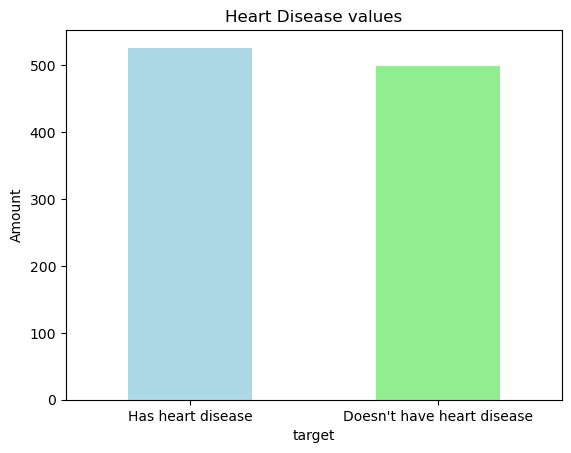

In [31]:
fig = heart_disease.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

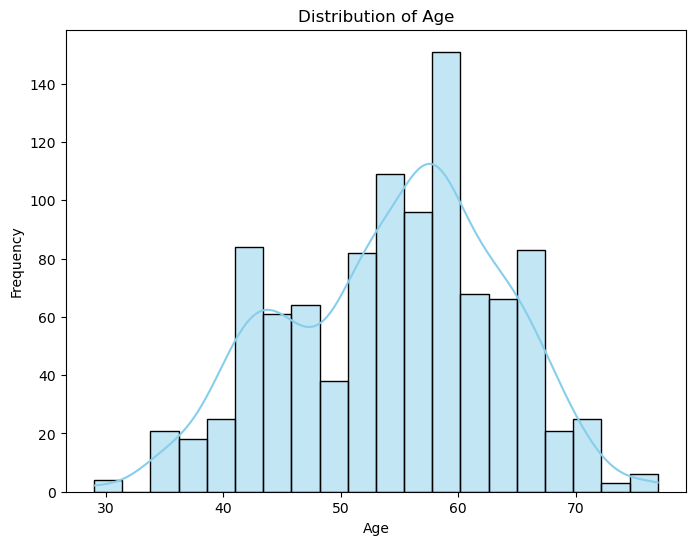

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(heart_disease['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

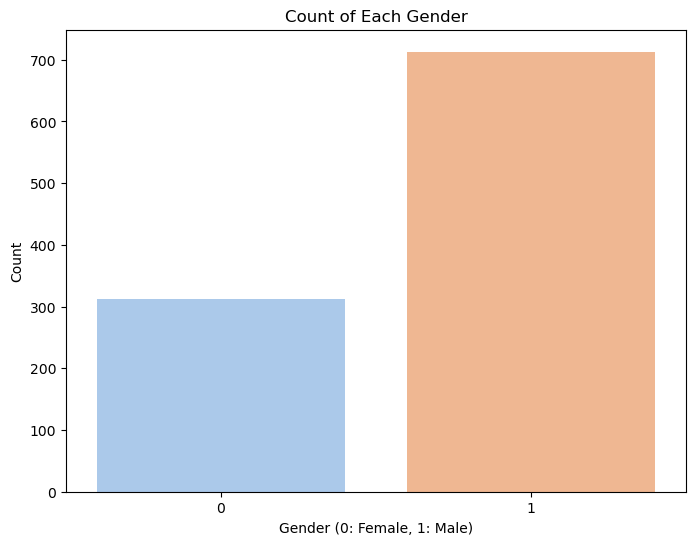

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=heart_disease, palette='pastel')
plt.title('Count of Each Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()


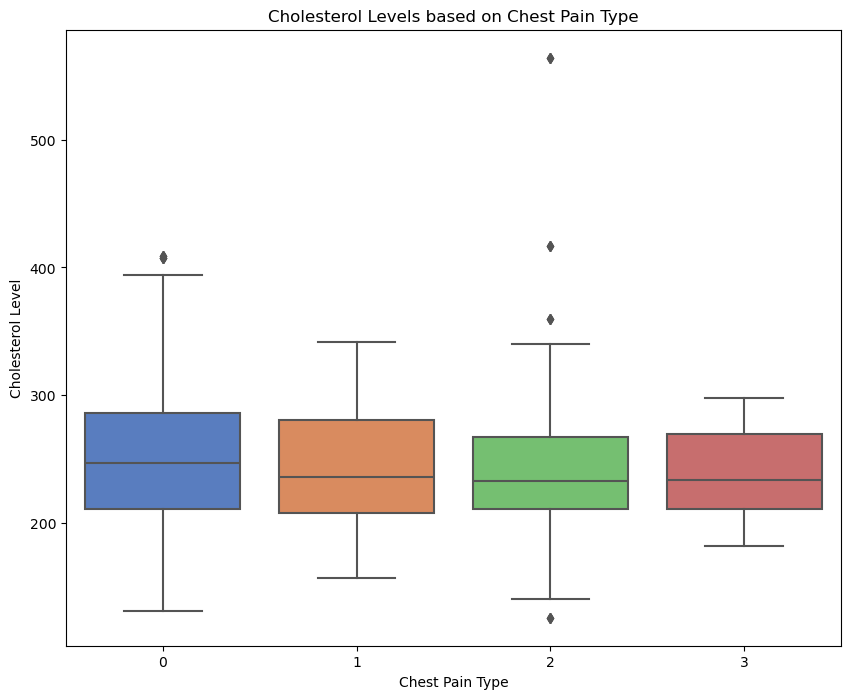

In [34]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='cp', y='chol', data=heart_disease, palette='muted')
plt.title('Cholesterol Levels based on Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.show()


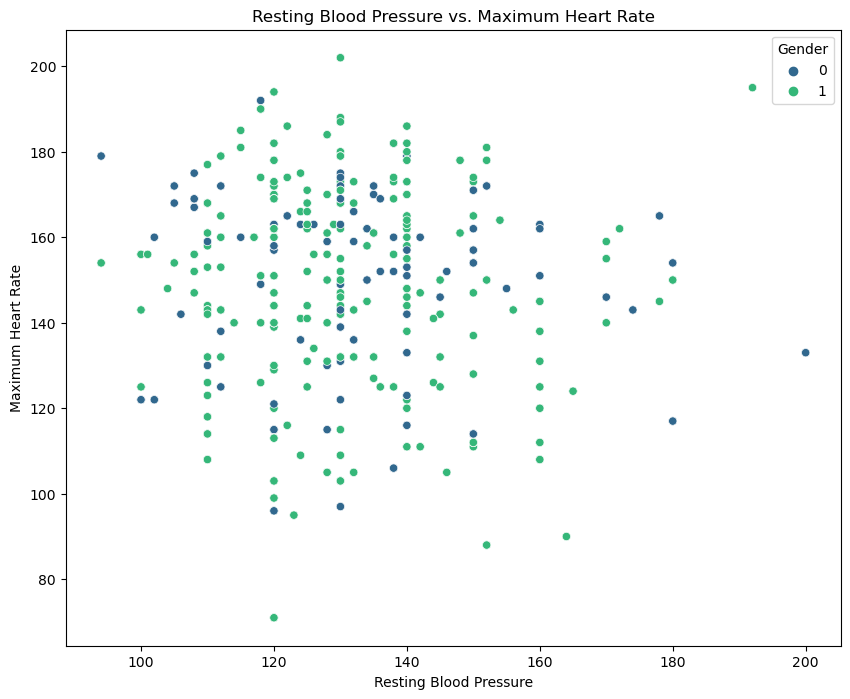

In [35]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='trestbps', y='thalach', data=heart_disease, hue='sex', palette='viridis')
plt.title('Resting Blood Pressure vs. Maximum Heart Rate')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Gender')
plt.show()
